# Аналих тарифных планов для телеком компании <a name='0'></a>

Клиентам федерального оператора сотовой связи предлагают два ключевых тарифных плана: «Смарт» и «Ультра». Для анализа тарифов предоставленны данные о 500 пользователях за 2018 год: город, каким тарифом пользуются, сколько звонков и сообщений каждый отправил, как расходовался интернет-трафик.  
  
Задача: проанализировать поведение клиентов, выявить эффективный тариф и дать рекомендации для коммерческого отдела по корректировкам рекламного бюджета.  

____
### Оглавление

#### [Часть 1. Первичное изучение полученных данных](#1)

   [1.1 Загрузка библиотек и файлов с данными](#1.1)  
   [1.2 Изучение основных параметров датафрейма](#1.2)  
   [1.3 Общее описание полученных данных](#1.3)  
   [1.4 Выводы](#1.4)  

#### [Часть 2. Подготовка данных к анализу](#2)

   [2.1 Замена типов данных](#2.1)  
   [2.2 Дополнительные расчеты:](#2.2)  
       [— подсчет расходов клиентов разных тарифов](#2.2.1)  
       [— промежуточные выводы](#2.2.2)  
       [— подсчет совокупной выручки с пользователя](#2.2.3)  
   [2.3 Выводы](#2.3)

#### [Часть 3. Анализ ключевых тарифных планов компании](#3)

   [3.1 Подготовка данных и анализ основных статистических показателей](#3.1)  
   [3.2 Выводы](#3.2)    

#### [Часть 4. Статистическая проверка рабочих гипотез](#4)

   [4.1 Проверка гипотез о средней выручке от разных тарифных планов](#4.1)  
   [4.2 Проверка гипотез о средней выручке по клиентам Москвы и других регионов](#4.2)    
   [4.3 Выводы](#4.3)  

#### [Часть 5. Итоговые выводы исследования](#5)
____

# Часть 1. Первичное изучение полученных данных <a name='1'></a>

### 1.1 Загрузка библиотек и файлов с данными <a name='1.1'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
calls = "../datasets/Telecom_ company_calls.csv"
internet = "../datasets/Telecom_ company_internet.csv"
messages = "../datasets/Telecom_ company_messages.csv"
tariffs = "../datasets/Telecom_ company_tariffs.csv"
users = "../datasets/Telecom_ company_users.csv"

In [3]:
data_calls = pd.read_csv(calls)
data_internet = pd.read_csv(internet)
data_messages = pd.read_csv(messages)
data_tariffs = pd.read_csv(tariffs)
data_users = pd.read_csv(users)

### 1.2 Изучение основных параметров датафрейма <a name='1.2'></a>

In [4]:
# автоматизируем процесс с помощью функции
def df_info(data):
    display(data.head(3))
    print()
    display(data.info())
    print("\033[34m{} \033[0m{}".format("Количество дубликатов:", data.duplicated().sum()))

# подготовим словарь
data_name = {
    "calls" : data_calls , 
    "internet" : data_internet, 
    "messages" : data_messages, 
    "tariffs info" : data_tariffs, 
    "users info" : data_users
}

# проведем первичное исследование данных
for key in data_name:
    print("\033[1m\033[34m~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("Общая информация: '{}'".format(key))
    df_info(data_name[key])

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Общая информация: 'calls'


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

Количество дубликатов: 0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Общая информация: 'internet'


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

Количество дубликатов: 0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Общая информация: 'messages'


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

Количество дубликатов: 0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Общая информация: 'tariffs info'


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

Количество дубликатов: 0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Общая информация: 'users info'


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

Количество дубликатов: 0


### 1.3 Общее описание полученных данных <a name='1.3'></a>  
  
У нас есть данные по 500 клиентам федерального сотового оператора, которые хранятся в пяти таблицах.    

Таблицу `data_users` можно считать словарем по нашим клиентам, в ней 8 колонок:  

* *user_id* — уникальный ID клиента (тип данных `int64`)  
* *age* — возраст в годах (`int64`)  
* *churn_date* — дата прекращения пользования тарифом (`object`)  
* *city* — город (`object`)  
* *first_name* — имя (`object`)  
* *last_name* — фамилия  (`object`)  
* *reg_date* —  дата подключения тарифа  (`object`)  
* *tariff* — тарифный план  (`object`)  

Таблицу `data_tariffs` также можно считать словарем, она содержить информацию по тарифам `"smart"` и `"ultra"`.  
— включено в абонентскую плату за месяц:  
* *messages_included* — кол-во сообщений (`int64`)  
* *mb_per_month_included* — объём интернет-трафика (в мегабайтах) (`int64`)  
* *minutes_included* — кол-во минут разговора (`int64`)   
* *rub_monthly_fee* — абонентская плата в рублях (`int64`)   

— стоимость услуг сверх тарихного плана:  
* *rub_per_gb* — дополнительный гигабайт интернет-трафика (`int64`)  
* *rub_per_message* — сообщение (`int64`)  
* *rub_per_minute* — минута разговора (`int64`) 

— общее:  
* *tariff_name* — название тарифа (`object`)  

****

В таблице `data_calls` хранится информация о звонках пользователей, 4 колонки:  

- *id* — уникальный номер звонка (`object`)  
- *call_date* — дата звонка (`object`)  
- *duration* — длительность в минутах (`float64`)  
- *user_id* — ID клиента (`int64`)  

В таблице `data_internet` хранится информация об интернет-сессиях), 4+1 колонки:  

- *id* — уникальный номер сессии (`object`)  
- *mb_used* — объём потраченного за сессию интернет-трафика в мегабайтах (`float64`)  
- *session_date* — дата интернет-сессии (`object`)  
- *user_id* — ID клиента (`int64`)  
- пятый столбец *Unnamed: 0* содержит порядковый номер строки — индекс, его можно не учитывать в работе  

В таблице `data_messages` хранится информация об отправленных сообщениях), 3 колонки:  

- *id* — уникальный номер сообщения (`object`)  
- *message_date* — дата сообщения (`object`)  
- *user_id* — ID клиента (`int64`)  
  
**Дубликатов в данных не обнаружено**, некоторые типы данных отображаются некорректно, в таблице `users_info` есть пропуски в колонке *churn_date*.  

### 1.4 Выводы <a name='1.4'></a>
  
В работе нужно учесть следующие моменты:
* Независимо от тарифа всегда округляются вверх вверх значения минут и мегабайтов. Если пользователь проговорил 1 секунду, в тарифе засчитывается минута: **необходимо округлить вверх значения в столбцах** "duration" (таблица data_calls) и "mb_used" (таблица data_internet) и перевести в тип данных  `int64`.   
* Также в столбцах "duration" и "mb_used" **есть нулевые значения**, которые влияют на среднее количество и среднюю стоимость одного звонка/интернет-сессии: пропущенные звонки и отсутствие сети могли стать причиной появления нулевых значений.  
* **Пропущенные значения в столбце "churn_date"** таблицы data_users говорят о том, что на момент получения данных абонент был подключен к тарифному плану.   
* Стоит обратить внимание на то, что клиенты подключали тариф в течение года и есть пользователи, которые отключили тариф: срок использования тарифа может говорить об его удобстве/выгодности для клиента и других явлениях. **Далее мы будем считать, что стоимость тарифного плана снимается в начале месяца за весь месяц** и не возвращается в случае досрочного отключения тарифного плана.  
* Необходимо перевести в тип данных `datatime` столбцы с датами в таблицах: churn_date, reg_date, call_date, session_date, message_date.

# Часть 2. Подготовка данных к анализу <a name='2'></a>

### 2.1 Замена типов данных <a name='2.1'></a>

In [5]:
# округлим вверх значения в столбцах duration и mb_used
data_calls["duration"] = data_calls["duration"].apply(math.ceil)
data_internet["mb_used"] = data_internet["mb_used"].apply(math.ceil)

In [6]:
# изменим тип данных для столбцов с датами
# и создадим новый столбец "month"

# автоматизируем процесс с помощью функции
def correct_date(data):
    for column in data:
        if "date" in column:
            data[column] = pd.to_datetime(data[column], format="%Y-%m-%d")
            data["month"] = data[column].dt.month

In [7]:
# применим функцию ко всем таблицам с помощью словаря "data_name"
for key in data_name:
    correct_date(data_name[key])
    # проверяем результат замены типов данных
    print("\033[34mИнформация по таблице '{}'\033[0m".format(key))
    display(data_name[key].info())

Информация по таблице 'calls'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.7+ MB


None

Информация по таблице 'internet'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  int64         
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
 5   month         149396 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 6.8+ MB


None

Информация по таблице 'messages'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month         123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


None

Информация по таблице 'tariffs info'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

Информация по таблице 'users info'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
 8   month       500 non-null    int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 35.3+ KB


None

### 2.2 Дополнительные расчеты и агрегация данных в единую таблицу <a name='2.2'></a>

In [8]:
# подсчитаем кол-во сделанных звонков и их продолжительность по месяцам
calls = (
    data_calls
    .pivot_table(index=["user_id", "month"], values="duration", aggfunc=["count", "sum"])
    .reset_index()
)

# переименуем столбцы
calls.columns = ["user_id", "month", "calls_total", "duration_sum"]

# проверим результат
calls.head(3)

,user_id,month,calls_total,duration_sum
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340


In [9]:
# подсчитаем количество отправленных сообщений по месяцам
messages = (
    data_messages
    .pivot_table(index=["user_id", "month"], values="id", aggfunc="count")
    .reset_index()
)

# переименуем столбцы
messages.columns = ["user_id", "month", "messages_count"]

# проверим результат
messages.head(3)

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75


In [10]:
# подсчитаем объем израсходованного интернет-трафика по месяцам
internet = (
    data_internet
    .pivot_table(index=["user_id", "month"], values="mb_used", aggfunc="sum")
    .reset_index()
)

# проверим результат
internet.head(3)

,user_id,month,mb_used
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016


In [11]:
# сохраним необходимые данные из словаря-базы данных по клиентам
users = data_users[["user_id", "city", "tariff"]]

In [12]:
# создадим единую таблицу с данными
data_megaline_users = (
    calls
    .merge(messages, how="outer")
    .merge(internet, how="outer")
    .astype("Int64")
    .merge(users)
)

# проверим результат
data_megaline_users.info()
data_megaline_users.groupby("user_id").first().head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         3214 non-null   Int64 
 1   month           3214 non-null   Int64 
 2   calls_total     3174 non-null   Int64 
 3   duration_sum    3174 non-null   Int64 
 4   messages_count  2717 non-null   Int64 
 5   mb_used         3203 non-null   Int64 
 6   city            3214 non-null   object
 7   tariff          3214 non-null   object
dtypes: Int64(6), object(2)
memory usage: 244.8+ KB


,month,calls_total,duration_sum,messages_count,mb_used,city,tariff
user_id,,,,,,,
1000,5,22,159,22,2256,Краснодар,ultra
1001,11,59,430,<NA>,18452,Москва,smart
1002,6,15,117,4,10871,Стерлитамак,smart


In [13]:
# изучим наличие пропусков и узнаем какими услугами меньше всего пользуются
data_megaline_users.isnull().sum()

user_id             0
month               0
calls_total        40
duration_sum       40
messages_count    497
mb_used            11
city                0
tariff              0
dtype: int64

In [14]:
print("Количество звонков равных 0,0 минут: ", data_calls.query("duration == 0")["duration"].count())
print("Количество звонков всего: ", data_calls["duration"].count())

Количество звонков равных 0,0 минут:  39613
Количество звонков всего:  202607


#### Промежуточный вывод  <a name='2.2.2'></a>
  
В таблице `data_calls` находятся данные о 202607 звонках, из которых 39613 равны 0 минут 0 секунд разговора. Такие звонки не учитываются в тарифах компании, поэтому они не влияют на суммарное количество израсходованных минут связи. Для дальнейшего исследования количество сделанных звонков не важно, поэтому в таблице сохранено только  общее количество сделанных звонков без изменений.  
  
Если в дальнейшем понадобится узнать такие параметры, как средняя продолжительность разговора в месяц/год, звонки с нулевыми значениями могут повлиять на результат (занизить среднюю продолжительность) — это необходимо учесть, опираясь на цели исследования. Для этого достаточно добавить при создании таблицы `calls` условие `.query("duration > 0")` — так получим срез по ненулевым звонкам и составим сводную таблицу, по которой можно вести расчеты средней продолжительности разговора.  
  
**На данном этапе получена сводная таблица** `data_megaline_users` с минутами разговора, количеством сообщений, израсходованном интернет-трафиком по месяцам за 2018 год, а также с данными о месте проживания и подключенному тарифу по id пользователей. *В таблице есть пропуски*, говорящие о том, что пользователи не используют некоторые  услуги в рамках тарифа. Наибольшее количество пропусков — 497 — у услуги смс-сообщений. *Далее эти пропуски заменим на 0.*

In [15]:
# заменим пропущенные значения на 0
data_megaline_users = data_megaline_users.fillna(0)
data_megaline_users.isnull().sum()

user_id           0
month             0
calls_total       0
duration_sum      0
messages_count    0
mb_used           0
city              0
tariff            0
dtype: int64

Далее вычислим помесячную выручку с каждого пользователя: <a name='2.2.3'></a>

In [16]:
# автоматизируем с помощью функции
def revenue_megaline(data):
    # переменные для рассчетов
    calls = data["duration_sum"]
    sms = data["messages_count"]
    inet = data["mb_used"]
    tariff = data["tariff"]
    # условия обслуживания по тарифному плану
    calls_cost = int(data_tariffs.loc[data_tariffs["tariff_name"] == tariff, "minutes_included"])
    sms_cost = int(data_tariffs.loc[data_tariffs["tariff_name"] == tariff, "messages_included"])
    inet_cost = int(data_tariffs.loc[data_tariffs["tariff_name"] == tariff, "mb_per_month_included"])
    tariff_cost = int(data_tariffs.loc[data_tariffs["tariff_name"] == tariff, "rub_monthly_fee"])
    # рассчитаем итоговую стоимость услуг
    revenue = (
        # стоимость разговоров сверх тарифного плана
        max(calls - calls_cost, 0) * int(data_tariffs.loc[data_tariffs["tariff_name"] == tariff, "rub_per_minute"])
        # стоимость отправленных сообщений 
        + max(sms - sms_cost, 0) * int(data_tariffs.loc[data_tariffs["tariff_name"] == tariff, "rub_per_message"])
        # стоимость интернета сверх тарифа (округление в большую сторону до Гб)
        + math.ceil(max(inet - inet_cost, 0) / 1024) 
        * int(data_tariffs.loc[data_tariffs["tariff_name"] == tariff, "rub_per_gb"])
        # абонентская плата по тарифу
        + tariff_cost
        )
    return revenue

In [17]:
# применим функцию к датафрейму с данными по клиентам Мегалайна
data_megaline_users["revenue"] = data_megaline_users.apply(revenue_megaline, axis=1)

# проверим результат
data_megaline_users.groupby("user_id").first().head(3)

,month,calls_total,duration_sum,messages_count,mb_used,city,tariff,revenue
user_id,,,,,,,,
1000,5,22,159,22,2256,Краснодар,ultra,1950
1001,11,59,430,0,18452,Москва,smart,1350
1002,6,15,117,4,10871,Стерлитамак,smart,550


# Выводы <a name='2.3'></a>  
  
На данном этапе мы подсчитали:  
* количество сделанных звонков и израсходованных минут разговора по месяцам (колонки `calls_total` и `duration_sum`),
* количество отправленных сообщений по месяцам (`messages_count`),  
* объем израсходованного интернет-трафика по месяцам (`mb_used`),  
* помесячную выручку с каждого пользователя сохранили в колонке `revenue`.  
  
Пропущенные значения заменили на 0, исходя из логики, что отсутствие данных говорит о том, что клиент данной услугой не пользовался. Замена была также необходима для расчета общей выручки по месяцам для каждого клиента.  
  
При расчете стоимости интернет-услуг, использованных сверх тарифа учитывалось, что по условиям тарифа компания округляет вверх значения минут и мегабайтов: стоимость дополнительного трафика указана в рублях за Гб, соответственно клиент приобретает дополнительно к тарифу трафик в Гб, а не оплачивает услуги интернета по мегабайтам. 

# Часть 3. Анализ ключевых тарифных планов компании <a name='3'></a>

### 3.1 Подготовка данных и анализ основных статистических показателей

In [18]:
# пользователи тарифа "smart"
data_megaline_smart = data_megaline_users.query("tariff == 'smart'").reset_index(drop=True)

# пользователи тарифа "ultra"
data_megaline_ultra = data_megaline_users.query("tariff == 'ultra'").reset_index(drop=True)

# проверим результат
display(data_megaline_smart.head(3), data_megaline_ultra.head(3))

,user_id,month,calls_total,duration_sum,messages_count,mb_used,city,tariff,revenue
0,1001,11,59,430,0,18452,Москва,smart,1350
1,1001,12,63,414,0,14053,Москва,smart,550
2,1002,6,15,117,4,10871,Стерлитамак,smart,550


,user_id,month,calls_total,duration_sum,messages_count,mb_used,city,tariff,revenue
0,1000,5,22,159,22,2256,Краснодар,ultra,1950
1,1000,6,43,172,60,23257,Краснодар,ultra,1950
2,1000,7,47,340,75,14016,Краснодар,ultra,1950


Узнаем среднее количество, дисперсию и стандартное отклонение для каждого тарифа по столбцам "duration_sum", "messages_count" и "mb_used" и построем гистограммы.


In [19]:
# составим словарь для автоматизации подсчетов
dict_used_tariff = ({
    "duration_sum" : "calls_duration",
    "messages_count" : "messages_count",
    "mb_used" : "internet_traffic"
})

# функция подсчета среднего, дисперсии и стандартного отклонения для выборки
def math_stat(data):
    print("Среднее значение: ", data.mean().round(1), "(медиана: {})".format(data.median()))
    print("Дисперсия: ", np.var(data, ddof=1).round(1))
    print("Стандартное отклонение: ", np.std(data, ddof=1).round(1))

# функция для автоматизации постоения гистограмм
def hist_stat(data_one, data_two, dict_data):
    sns.set(rc={"figure.figsize":(19, 7)}, font_scale = 1, style="darkgrid", palette="rainbow")
    
    ax = data_one.hist(bins=50, alpha=0.5, label="ultra")
    data_two.hist(bins=50, alpha=0.5, label="smart")
    
    ax.set_ylabel("Количество пользователей")
    ax.set_xlabel("{}".format(dict_data))
    ax.legend()
    
    plt.show()

Статистические данные по параметру 'calls_duration' для тарифов Мегалайн


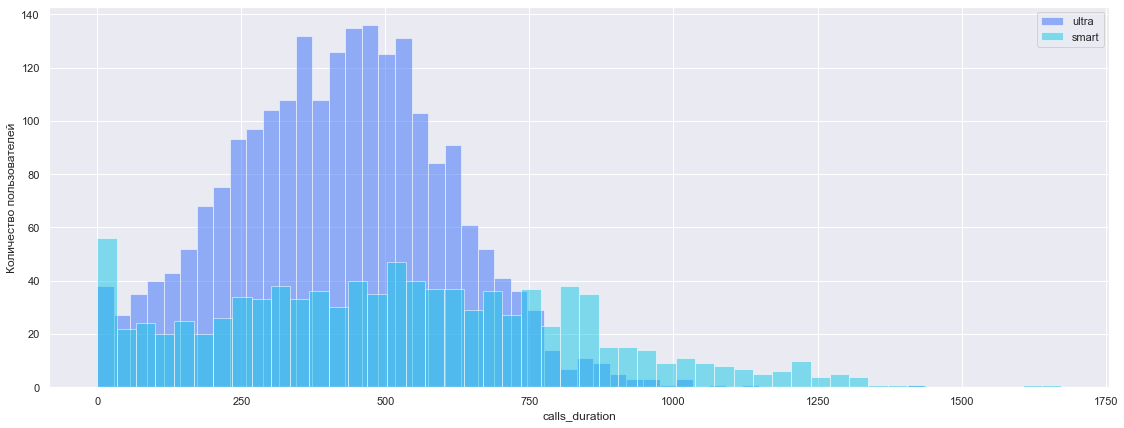

Для тарифа 'Ultra'
Среднее значение:  526.6 (медиана: 518.0)
Дисперсия:  100873.6
Стандартное отклонение:  317.6
Для тарифа 'Smart'
Среднее значение:  417.9 (медиана: 422.0)
Дисперсия:  36219.3
Стандартное отклонение:  190.3


Статистические данные по параметру 'messages_count' для тарифов Мегалайн


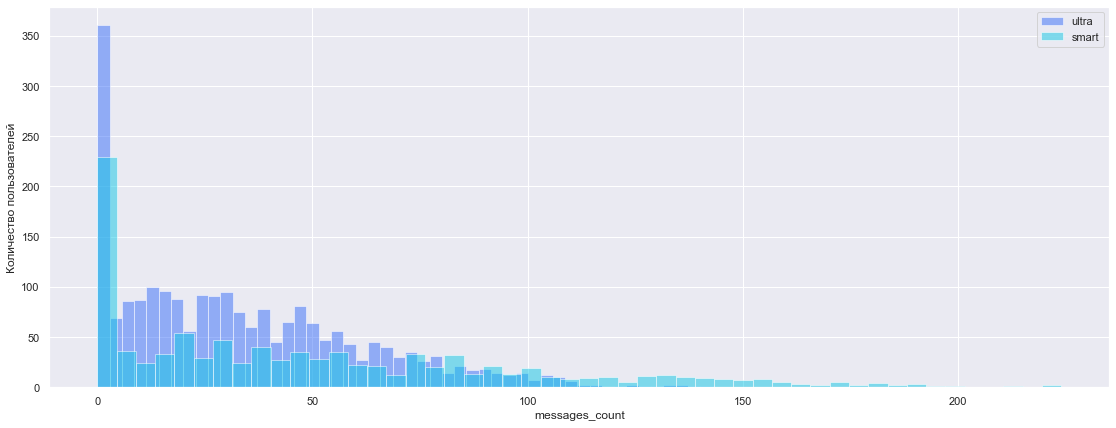

Для тарифа 'Ultra'
Среднее значение:  49.4 (медиана: 38.0)
Дисперсия:  2285.3
Стандартное отклонение:  47.8
Для тарифа 'Smart'
Среднее значение:  33.4 (медиана: 28.0)
Дисперсия:  796.8
Стандартное отклонение:  28.2


Статистические данные по параметру 'internet_traffic' для тарифов Мегалайн


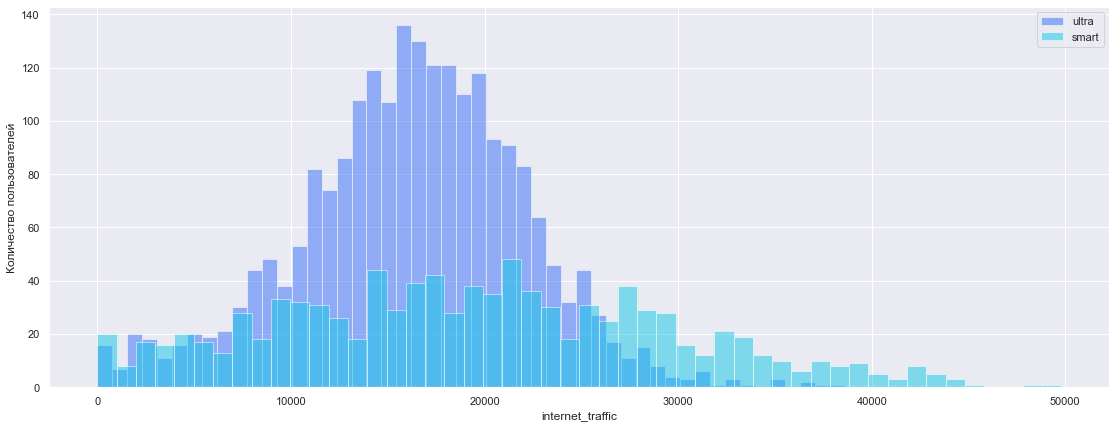

Для тарифа 'Ultra'
Среднее значение:  19486.9 (медиана: 19324.0)
Дисперсия:  101935621.0
Стандартное отклонение:  10096.3
Для тарифа 'Smart'
Среднее значение:  16229.2 (медиана: 16531.0)
Дисперсия:  34545911.1
Стандартное отклонение:  5877.6




In [20]:
# создадим цикл для расчета основных статистических показателей
for column in dict_used_tariff:
    # применем функцию для построения гистограмм
    print("\033[1m\033[34mСтатистические данные по параметру '{}' для тарифов Мегалайн"
          .format(dict_used_tariff[column]))
    hist_stat(data_megaline_smart[column], data_megaline_ultra[column], dict_used_tariff[column])
    # выведем основные статистики к каждой гистограмме
    print("\033[1mДля тарифа 'Ultra'\033[0m")
    math_stat(data_megaline_ultra[column])
    print("\033[1mДля тарифа 'Smart'\033[0m")
    math_stat(data_megaline_smart[column])
    print("\n")

# 3.2 Выводы  <a name='3.2'></a>  
  
В среднем клиенты Мегалайна, подключенные к  тарифу "smart", используют:  
* 418 минут разговора из 500 доступных по тарифу,    
* 33 смс-сообщения из 50 доступных,  
* ~16 Гб из указанных в тарифе 15 Гб (15 360 Мб), что превышает лимит и требует дополнительной оплаты услуг (200 р за 1 Гб сверх лимита).  
  
Клиенты Мегалайна, использующие тариф "Ultra", в среднем расходуют:  
* 527 минут разговора из 3000,  
* 49 смс-сообщений из 1000,  
* ~19 Гб интернет-трафика из 30 Гб.  
  
Учитывая данные о стандарном отклонении, можно сделать предварительный вывод, что в большинстве случаев **пользователи тарифа "ultra" значительно реже превышают ежемесячный лимит** своего тарифа, чем пользователи тарифа "smart". Пользователи тарифа "smart" регулярно превышают лимиты использования интернет-трафика, а по всем остальным параметрам в среднем сильно близки к лимитам.  
  
**Интересное наблюдение можно сделать из визуализации данных:** в общих чертах "поведение" клиентов обоих тарифов схоже и основная аудитория распределена относительно равномерно в диапазоне 220-700 минут разговора, 0-50 смс-сообщений и 11-25 Гб интернет-трафика.*Можно в дальнейшем углубить исследование поведения клиентов,* основываясь на гипотезе, что их основные потребности в объеме услуг одинаковы. Также можно проверить в рамках дополнительного исследования, что клиенты тарифа "smart" чаще следят за лимитами тарифа (гипотеза: клиенты тарифа "smart" расходуют большую часть лимита в первой половине месяца, а ближе к концу — ограничивают потребление услуг).

# Часть 4. Статистическая проверка рабочих гипотез <a name='4'></a> 

Этап формирования гипотез для статистической проверки.  
Наша задача проверить два утверждения:  
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается,  
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.  
  
Нулевая гипотеза H<sub>0</sub> всегда формулируется с использованием знака равенства.  

### 4.1 Проверга гипотез о средней выручке от разных тарифных планов <a name='4.1'></a>

Для первого утверждения мы сформулируем гипотезу о равенстве двух генеральных совокупностей по взятым из них выборкам (независимых друг от друга). Чтобы проверить гипотезу, применим метод `scipy.stats.ttest_ind(array1, array2, equal_var)` и проведем односторонний тест.  
  
Посмотрим на средние показатели по выручке от двух тарифов:

In [21]:
print("Средняя выручка с пользователя тарифа Smart: ", data_megaline_smart["revenue"].mean().round(2), 
      "\n", 
      "Средняя выручка с пользователя тарифа Ultra: ",data_megaline_ultra["revenue"].mean().round(2))

Средняя выручка с пользователя тарифа Smart:  1294.64 
 Средняя выручка с пользователя тарифа Ultra:  2071.07


Мы видим, что выручка по тарифу Smart, очевидно, ниже выручки по тарифу Ultra. Нам необходимо выяснить является ли этот результат статистически значимым. 

**Для этого сформулируем нулевую и альтернативные гипотезы:**  
H<sub>0</sub>: средняя выручка с пользователя тарифа Smart больше или равна средней выручке Ultra,  
H<sub>1</sub>: средняя выручка с пользователя тарифа Ultra больше средней выручки Smart.  

In [22]:
# зададим уровень критической статистической значимости
alpha = 0.05

Посмотрим на дисперсии показателей выручки по тарифу Smart и Ultra. Применим написанную ранее функцию (выше мы рассчитывали среднее, этот код можно будет убрать, так как он дублирует данные функции.

In [23]:
# статистики для тарифа Smart
math_stat(data_megaline_smart["revenue"])

Среднее значение:  1294.6 (медиана: 1038.0)
Дисперсия:  673931.3
Стандартное отклонение:  820.9


In [24]:
# статистики для тарифа Ultra
math_stat(data_megaline_ultra["revenue"])

Среднее значение:  2071.1 (медиана: 1950.0)
Дисперсия:  143491.2
Стандартное отклонение:  378.8


Вывод: дисперсия для тарифа Smart больше дисперсии для тарифа Ultra почти в два раза, это означает, что мы не можем считать примерно равными дисперсии двух генеральных совокупностей и должны установить параметр `equal_var = False` при проверке гипотез ниже.

In [25]:
# проверим нулевую гипотезу
result_first_hipothesis = st.stats.ttest_ind(
    data_megaline_ultra["revenue"],
    data_megaline_smart["revenue"],
    equal_var = False
)
print("Результат теста: ", result_first_hipothesis)

# на выхрде метод дает результат для для двустороннего t-теста, 
# поэтому делим p-value на 2 (у нас односторонний тест) 
# и добавляем условие "smart revenue mean >= ultra revenue mean"
print("p-значение для одностороннего теста: ", result_first_hipothesis.pvalue / 2)
if (result_first_hipothesis.pvalue / 2 < alpha 
    and data_megaline_ultra["revenue"].mean() > data_megaline_smart["revenue"].mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Результат теста:  Ttest_indResult(statistic=36.68175826499966, pvalue=2.7240946993530856e-246)
p-значение для одностороннего теста:  1.3620473496765428e-246
Отвергаем нулевую гипотезу


#### Вывод по первой паре гипотез:
Полученное значение p-value говорит о том, что результат является статистически значимым и мы отвергаем нулевую гипотезу** в пользу альтернативной: средняя выручка с пользователя тарифа Ultra больше средней выручки Smart.   

### 4.2 Проверка гипотез о средней выручке по клиентам Москвы и других регионов <a name='4.2'></a>

Для второго утверждения мы сформулируем двустороннюю гипотезу о равенстве среднего генеральной совокупности некоторому значению и проверим ее с помощью метода `scipy.stats.ttest_1samp(array, popmean)`.  
  
**Сформулируем нулевую и альтернативную гипотезы** для утверждения "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов":   
H<sub>0</sub>: средняя выручка по Москве равна средней выручки по остальным регионам  
H<sub>1</sub>: средние выручки в Москве и регионах не равны  

In [26]:
# проверим, есть ли МО в датасете
data_megaline_users["city"].sort_values().unique()

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

Химки — один из крупнейших городов-спутников Москвы, входит в Московскую область и находится в непосредственной близости от МКАД. Чтобы избежать искажения данных, мы включим Химки в выборку по городу Москва.

In [27]:
# создадим value-переменную: средняя выручка по регионам (кроме Москвы и МО)
region_revenue_value = data_megaline_users.query("city != 'Москва' and city != 'Химки'")["revenue"].mean()

# создадим срез данных по Москве и МО
megaline_moscow = data_megaline_users.query("city == 'Москва' or city == 'Химки'")["revenue"]

Cравним дисперсии, применим другой метод — проверка равенства средних двух генеральных совокупностей (по выборкам из них) и настроим тест Стьюдета.

In [28]:
# статистики для Москвы и Мо
math_stat(megaline_moscow)

Среднее значение:  1543.4 (медиана: 1750.0)
Дисперсия:  568492.6
Стандартное отклонение:  754.0


In [29]:
# статистики для регионов
megaline_region = data_megaline_users.query("'Москва' not in city and 'Химки' not in city")["revenue"]
math_stat(megaline_region)

Среднее значение:  1530.0 (медиана: 1594.0)
Дисперсия:  656456.1
Стандартное отклонение:  810.2


Дисперсия по регионам на 13% больше дисперсии по Москве, это достаточно большая разница, хотя эмпирически есть все основания полагать, что выборки взяты из схожих по параметрам совокупностей. Однако, при настройке теста лучше указать параметр `equal_var = False` и выполнить подсчеты методом `scipy.stats.ttest_ind(array1, array2, equal_var)`

In [30]:
# проверим нулевую гипотезу
result_second_hipothesis = st.stats.ttest_ind(megaline_moscow, megaline_region, equal_var=False)

# тест односторонний: p-value будет в два раза меньше
print("p-значение: ", result_second_hipothesis.pvalue)

if (result_second_hipothesis.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.6966637640169093
Не получилось отвергнуть нулевую гипотезу


#### Вывод по второй паре гипотез:
Полученное значение p-value говорит о том, что результат не является статистически значимым и мы не можем отвергнуть нулевую гипотезу в пользу альтернативной, это означает, что мы принимаем гипотезу: средняя выручка по Москве равна средней выручке по остальным регионам.

### 4.3 Выводы <a name='4.3'></a>  
  
В результате проверки статистической значимости гипотез мы приняли гипотезу о том, что средняя ежемесячная выручка с пользователя тарифа Ultra выше, чем с пользователя тарифа Smart. При этом чаще всего это не зависит от города проживания клиента, так как мы не смогли отвергнуть гипотезу, что средняя выручка по Москве и МО равна средней выручки по остальным регионам.

# Часть 5 Итоговые выводы исследования <a name='5'></a>  
  
Мы проанализировали услуги федерального оператора сотовой связи на выборке из 500 пользователей двух основных тарифов компании — Smart и Ultra. Предоставленные данные содержали информацию о продолжительности и количестве сделанных звонков, отправленных сообщений и использованного интернет-трафика, а также подробную информацию о пользователях и условиях тарифных планов.  
  
В результате проверки гипотез было выявлено, что с высокой статистической значимостью можно принять утверждение, что тарифный план Ultra выгоднее для компании с финансовой точки зрения. Поэтому **рекомендуем пересмотреть распределение рекламного бюджета в пользу тарифа Ultra. При этом можно масштабировать рекламные кампании за счет таргетированной рекламы, включая региональные рынки** для тарифа Ultra.  
  
В большинстве случаев пользователи тарифа Ultra значительно реже превышают ежемесячный лимит по тарифу, чем пользователи тарифа Smart. **Для создания новых и эмоциональных рекламных кампаний рекомендуем продолжить исследовать поведение клиентов** проверить гипотезу: пользователи тарифа Smart расходуют больший объем услуг и приближаются к лимитам в первой половине "тарифного" месяца, а оставшееся время больше следят за расходами и начинают экономить минуты/сообщения/интернет. Для этого нужны дополнительные данные о дате списания оплаты по тарифу для каждого пользователя.   
  
В случае принятия гипотезы, в рекламных кампаниях можно задействовать инсайт "я расходую большую часть лимита услуг связи в первой половине месяца, поэтому мне приходится следить за балансом и нервничать из-за невозможности спланировать бюджет заранее, было бы здорово не чувствовать ограничений и забыть о переплатах за мобильную связь". Для таких клиентов переход на тариф Ultra может стать решением "личной драмы". Проверить эту гипотезу можно с помощью А/Б-теста.   
  
Также стоить отметить, что **"поведение" клиентов обоих тарифов схоже** и основная аудитория распределена относительно равномерно в диапазоне 220-700 минут разговора, 0-50 смс-сообщений и 11-25 Гб интернет-трафика. Можно в дальнейшем углубить исследование поведения клиентов, основываясь на гипотезе, что их основные потребности в объеме услуг одинаковы.  
  
**Рекомендуем рассмотреть стимулирующие акции в поддержку перехода лояльных клиентов из тарифа Smart в тариф Ultra**, при этом первоначально рекомендуем протестировать гипотезы, связанные с акциями на интернет-трафик, так как по предварительным исследованиям по этой статье чаще всего клиенты платят за услуги сверх лимита.

____
**<center>[Перейти в начало исследования](#0)</center>**